# 1. Подготовка

In [1]:
### Python2.7
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

import seaborn as sns
import pylab as pl
from sklearn.tree import export_graphviz

pd.set_option('display.precision', 3);
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("bike-sharing-dataset-clean.csv", # путь к файлу, используй автодотолнение
                   sep=',', # разделитель данных в файле
                   header=0 # номер строки с заголовками. header='None', если заголовки отсутствуют
                  )

Просмотрим основную информацию о наборе

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17357 entries, 0 to 17356
Data columns (total 18 columns):
Unnamed: 0    17357 non-null int64
instant       17357 non-null int64
dteday        17357 non-null object
season        17357 non-null int64
yr            17357 non-null int64
mnth          17357 non-null int64
hr            17357 non-null int64
holiday       17357 non-null int64
weekday       17357 non-null int64
workingday    17357 non-null int64
weathersit    17357 non-null int64
temp          17357 non-null float64
atemp         17357 non-null float64
hum           17357 non-null float64
windspeed     17357 non-null float64
casual        17357 non-null int64
registered    17357 non-null int64
cnt           17357 non-null int64
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


Набор данных содержит 17357 строки, 18 столбца

In [4]:
#Убедимся в отсутсвии пропусков
data.isnull().sum() 

Unnamed: 0    0
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# описание для всех столбцов
data.describe(include='all') 

,Unnamed: 0,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17357.000,17357.000,17357,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000,17357.000
unique,NaN,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8698.034,8699.034,NaN,2.504,0.503,6.542,11.546,0.029,3.002,0.682,1.423,0.497,0.476,0.628,0.190,35.719,153.949,189.667
std,5013.782,5013.782,NaN,1.106,0.500,3.439,6.915,0.167,2.007,0.466,0.637,0.193,0.172,0.192,0.122,49.322,151.382,181.409
min,0.000,1.000,NaN,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.080,0.000,0.000,0.000,1.000
25%,4361.000,4362.000,NaN,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8700.000,8701.000,NaN,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,116.000,142.000
75%,13039.000,13040.000,NaN,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000


## 1.2. Разбиение на обучающую и тестовую выборку

В качестве целевого значения и независимых признаков выберем те же столбцы, что и в ЛР1

In [6]:
features = [ u'temp', u'hr', u'hum']
target = [u'cnt']

Проверим значения коэфф. парной корреляции для целевой переменной 

In [7]:
data[features+target].corr()['cnt']

temp    0.404
hr      0.395
hum    -0.329
cnt     1.000
Name: cnt, dtype: float64

Разделим выборку на обучающую (тренировочную, "train") и отложенная (проверочную, "test") части, методом **train_test_split**. В результате получим 4 объекта x_train, x_test, y_train, y_test.

In [8]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    data[features], data[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 
print "Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
)

Кол-во элементов: 
  x_train: 12149, y_train 12149 
  x_test:  5208, y_test  5208 
  total x: 17357, total y 17357 


In [9]:
x_test.head(2)

,temp,hr,hum
268,0.20,15,0.47
6472,0.34,4,0.87


In [10]:
y_test.head(2)

,cnt
268,49
6472,8


# 2. Регрессионные модели

## 2.1. Множественная линейная

Построим модель множественной линейной регрессии от трех переменных hum, hr, temp.

In [11]:
# создать модель
model_LinRegrMult = linear_model.LinearRegression()

# обучить модель на тренировочной части выборки
model_LinRegrMult.fit(x_train, y_train)

# получить предсказанные значения на проверочной части выборки
y_pred_LinRegrMult = model_LinRegrMult.predict(x_test)

In [12]:
print "Множественная линейная регрессия. Полный диапазон."
print "y_pred_lin_reg_mult (x1, x2, x3) =\n   {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}\n".format(
    model_LinRegrMult.coef_[0][0], features[0],
    model_LinRegrMult.coef_[0][1], features[1],
    model_LinRegrMult.coef_[0][2], features[2],
    model_LinRegrMult.intercept_[0])

mae_LinRegrMult = metrics.mean_absolute_error(y_test, y_pred_LinRegrMult)
r2_LinRegrMult  = metrics.r2_score           (y_test, y_pred_LinRegrMult)

print "MAE - Cредняя абсолютная ошибка: {:>7,.0f}".format( mae_LinRegrMult )
print "R2 - коэфф. детерминации:        {:>7,.3f}".format( r2_LinRegrMult )

Множественная линейная регрессия. Полный диапазон.
y_pred_lin_reg_mult (x1, x2, x3) =
   323.916*temp + 7.442*hr + -216.847*hum + 79.940

MAE - Cредняя абсолютная ошибка:     109
R2 - коэфф. детерминации:          0.329


Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

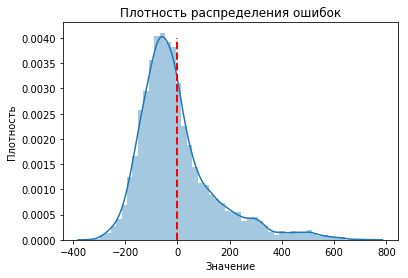

In [13]:
plt.figure(figsize=(6,4))
sns.distplot((y_test - y_pred_LinRegrMult))
plt.plot(
    [0, 0],
    [0, 4 * pow(10,-3)],
    '--', lw=2, c='r')
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

Text(0,0.5,u'\u041a\u0432\u0430\u0434\u0440\u0430\u0442 \u0437\u043d\u0430\u0447\u0435\u043d\u0438\u044f \u043e\u0448\u0438\u0431\u043a\u0438 \u043c\u043e\u0434\u0435\u043b\u0438 Y')

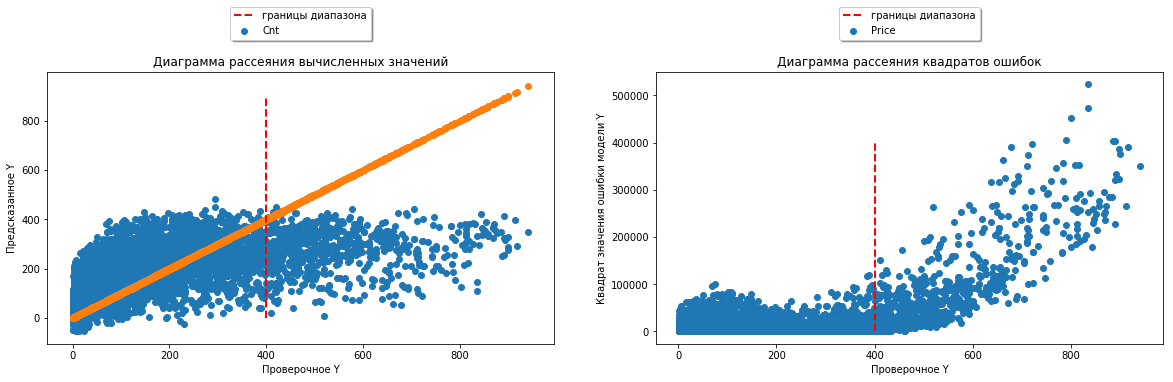

In [14]:
# Графики на одном полотне
plt.figure(figsize=figsize(20,5))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test, y_pred_LinRegrMult, label="Cnt")
plt.scatter(y_test, y_test)
# линия границы диапазона
plt.plot(
    [4 * pow(10,2), 4 * pow(10,2)],
    [0, 9 * pow(10,2)],
    '--', lw=2, label=u"границы диапазона", c='r')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),  ncol=1, fancybox=True, shadow=True)
plt.title(u'Диаграмма рассеяния вычисленных значений');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

# создать второе полотно 122: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test,  pow(abs(y_test - y_pred_LinRegrMult),2) , label="Price" )
# линия границы диапазона
plt.plot(
    [4 * pow(10,2), 4 * pow(10,2)],
    [0, 4 * pow(10,5)],
    '--', lw=2, label=u"границы диапазона", c='r')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),  ncol=1, fancybox=True, shadow=True)
plt.title(u'Диаграмма рассеяния квадратов ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Квадрат значения ошибки модели Y')

## 2.2. Диапазон применимости модели

На основе данных графика соотношения ошибок установим диапазон применимости модели множественной линейной регрессии. 

Диапазон для значений целевой переменной от 0 до 400. Сформируем новую выборку из данных входящий в этот диапазон. Работа с всеми следующими моделями будет осуществляться на выбранном диапазон данных.

In [15]:
# получить все строки удовлетворяющие условию
data_new =  data [  (data ['cnt']  < 630 ) ]

Сформируем новые обучающую (тренировочную, "train") и отложенную (проверочную, "test") части.

In [16]:
print "valid_size " + str(valid_size)
print "rand_seed " + str(rand_seed)
x_train_diap, x_test_diap, y_train_diap, y_test_diap =  train_test_split(
    data_new[features], data_new[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 
print "Кол-во элементов в диапазоне применимотси: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train_diap), len(x_test_diap),
    len(y_train_diap),  len(y_test_diap), 
    len(x_train_diap)+len(x_test_diap), len(y_train_diap)+len(y_test_diap),
)

valid_size 0.3
rand_seed 8
Кол-во элементов в диапазоне применимотси: 
  x_train: 11766, y_train 5043 
  x_test:  11766, y_test  5043 
  total x: 16809, total y 16809 


## 2.3. Модель множественной линейной регрессии на диапазоне применимости

Обучим  модель на новой выборке и сравним результы метрик.

In [17]:
model_LinRegrMult2 = linear_model.LinearRegression()

model_LinRegrMult2.fit(x_train_diap, y_train_diap)

y_pred_LinRegrMult2 = model_LinRegrMult2.predict(x_test_diap)

In [18]:
print "Множественная линейная регрессия. Усеченный диапазон."
print "model_LinRegrMult (x1, x2, x3) =\n   {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}\n".format(
    model_LinRegrMult.coef_[0][0], features[0],
    model_LinRegrMult.coef_[0][1], features[1],
    model_LinRegrMult.coef_[0][2], features[2],
    model_LinRegrMult.intercept_[0])


print "Множественная линейная регрессия. Полный диапазон."
print "model_LinRegrMult2 (x1, x2, x3) =\n   {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}*{:} + {:,.3f}\n".format(
    model_LinRegrMult2.coef_[0][0], features[0],
    model_LinRegrMult2.coef_[0][1], features[1],
    model_LinRegrMult2.coef_[0][2], features[2],
    model_LinRegrMult2.intercept_[0])

mae_LinRegrMult2 = metrics.mean_absolute_error(y_test_diap, y_pred_LinRegrMult2)
r2_LinRegrMult2  = metrics.r2_score           (y_test_diap, y_pred_LinRegrMult2)

print "MAE - средняя абсолютная ошибка: {:>7,.0f} Усеченный диап. | {:>7,.0f} Полный диап.".format( mae_LinRegrMult2, mae_LinRegrMult)
print "R2 - коэфф. детерминации:        {:>7,.3f} Усеченный диап. | {:>7,.3f} Полный диап.".format       ( r2_LinRegrMult2 , r2_LinRegrMult)

Множественная линейная регрессия. Усеченный диапазон.
model_LinRegrMult (x1, x2, x3) =
   323.916*temp + 7.442*hr + -216.847*hum + 79.940

Множественная линейная регрессия. Полный диапазон.
model_LinRegrMult2 (x1, x2, x3) =
   281.389*temp + 6.990*hr + -178.542*hum + 66.297

MAE - средняя абсолютная ошибка:      95 Усеченный диап. |     109 Полный диап.
R2 - коэфф. детерминации:          0.351 Усеченный диап. |   0.329 Полный диап.


Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435 Y')

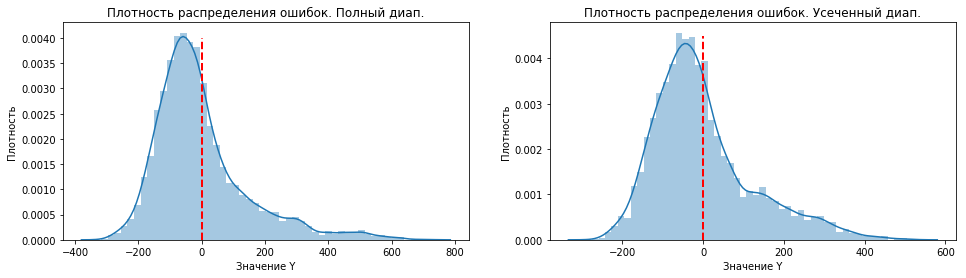

In [19]:
plt.figure(figsize=(16,4))

plt.subplot(121)
sns.distplot((y_test - y_pred_LinRegrMult))
# линия границы диапазона
plt.plot(
    [0, 0],
    [0, 4 * pow(10,-3)],  '--', lw=2, c='r')
plt.title(u'Плотность распределения ошибок. Полный диап.');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение Y')

plt.subplot(122)
sns.distplot((y_test_diap - y_pred_LinRegrMult2))
plt.plot(
    [0, 0],
    [0, 4.5 * pow(10,-3)], '--', lw=2, c='r')
plt.title(u'Плотность распределения ошибок. Усеченный диап.');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение Y')

Text(0,0.5,u'\u043a\u0432\u0430\u0434\u0440\u0430\u0442 \u0437\u043d\u0430\u0447\u0435\u043d\u0438\u044f \u041e\u0448\u0438\u0431\u043a\u0438 \u043c\u043e\u0434\u0435\u043b\u0438 Y')

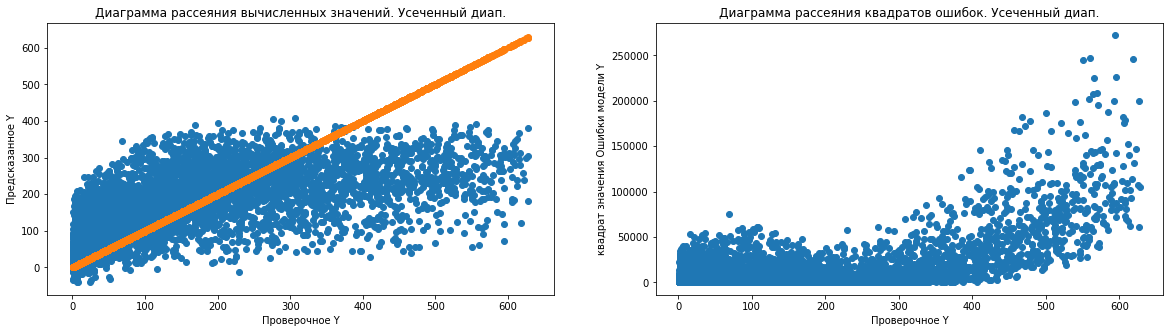

In [20]:
plt.figure(figsize=figsize(20,5))

plt.subplot(121)
plt.scatter(y_test_diap, y_pred_LinRegrMult2)
plt.scatter(y_test_diap, y_test_diap)
plt.title(u'Диаграмма рассеяния вычисленных значений. Усеченный диап.');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

plt.subplot(122)
plt.scatter(y_test_diap,  pow(abs(y_test_diap - y_pred_LinRegrMult2),2) )
plt.title(u'Диаграмма рассеяния квадратов ошибок. Усеченный диап.');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'квадрат значения Ошибки модели Y')

## 2.4. Дерево регрессии

Найдем оптимальную глубину дерева. Для этого последовательно рассчитаем метрики для моделей деревьев регрессии с различной глубиной. 

Сравнение проведем по метрике R2(коэфф. детерминации) рассчитанной двумя способами:
 - на отложенной части выборки (x_test, y_test)
 - методом кросс-валлидации на тренировочной части выборки (x_train, y_train)
 
| X       |       Y |  кросс-вал.№ | тип        |  
|---------|---------|---------|------------|
| X_train | Y_train | 1       | обучающая |
| X_train | Y_train | 2       | обучающая |
| X_train | Y_train | 3       | обучающая |
| X_train | Y_train | 4       | обучающая |
| X_train | Y_train | 5       | обучающая |
|---------|---------| -       | ---------- |
| X_test  | Y_test  | -       | отложенная |




Глубина дерева=1, R2_кросс.вал. 0.345, R2 на проверочной части = 0.357
[0.33755398 0.3448202  0.3501234  0.35198537 0.34147674]

Глубина дерева=2, R2_кросс.вал. 0.448, R2 на проверочной части = 0.444
[0.43748588 0.43412409 0.46979927 0.45590455 0.44115139]

Глубина дерева=3, R2_кросс.вал. 0.514, R2 на проверочной части = 0.518
[0.50436365 0.50606069 0.53137329 0.519      0.50867173]

Глубина дерева=4, R2_кросс.вал. 0.571, R2 на проверочной части = 0.589
[0.56577463 0.57322733 0.57875395 0.57567126 0.56395575]

Глубина дерева=5, R2_кросс.вал. 0.594, R2 на проверочной части = 0.619
[0.59165489 0.58985174 0.59533669 0.59973634 0.59177838]

Глубина дерева=6, R2_кросс.вал. 0.609, R2 на проверочной части = 0.638
[0.61051366 0.60632571 0.61083648 0.61838509 0.59966968]

Глубина дерева=7, R2_кросс.вал. 0.628, R2 на проверочной части = 0.654
[0.62531185 0.62961707 0.62991205 0.63442834 0.61951127]

Глубина дерева=8, R2_кросс.вал. 0.633, R2 на проверочной части = 0.659
[0.62964437 0.63692606 0.

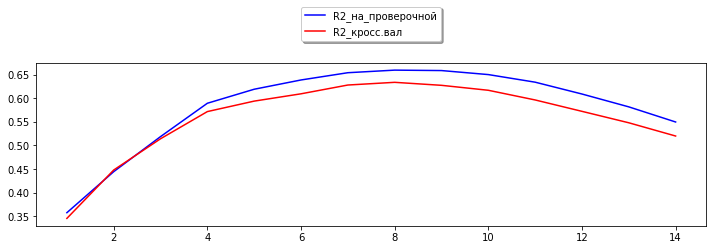

In [21]:
max_depth = 15
tree_seed=1
listR2_Cross = []
listR2_Test = []

for i in range (1,max_depth):
    # создать модель дерева регрессии с очередным значением глубины
    dtRegr = tree.DecisionTreeRegressor(max_depth=i, random_state=tree_seed )
    
    # обучить модель дерева регрессии на тренировочной части выборки
    dtRegr.fit(x_train_diap, y_train_diap)
    
    # получить предсказание модели на проверочной части выборки
    y_dtRegr = dtRegr.predict(x_test_diap)
    
    # получить оценку R2 на тренировочной подвыборке, разделенной на cv= 5 частей
    scores_cross = cross_val_score(dtRegr, x_train_diap, y_train_diap, cv=5, scoring='r2')
    
    # получить оценку R2 на проверочной подвыборке
    scores_test =  metrics.r2_score(y_test_diap, y_dtRegr)
    
    # сохранение результата
    listR2_Cross.append( scores_cross.mean() )
    listR2_Test.append( scores_test.mean() )
    
   
    print ""
    print "Глубина дерева={}, R2_кросс.вал. {:.3}, R2 на проверочной части = {:.3f}".format(
        dtRegr.max_depth, 
        listR2_Cross[i-1],
        listR2_Test[i-1]
    )
    print scores_cross
        
print "Максимальный R2= R2_кросс.вал. {:.3}, R2 на проверочной части = {:.3f}".format(

        max(listR2_Cross),
        max(listR2_Test)
    )

plt.figure(figsize(12, 3))
plt.plot( np.arange(1, max_depth, step=1) , listR2_Test ,  label= u"R2_на_проверочной", c="b")
plt.plot( np.arange(1, max_depth, step=1) , listR2_Cross,  label= u"R2_кросс.вал", c="r")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.1),  ncol=1, fancybox=True, shadow=True)

In [36]:
opt_depth= 5
treeRegr_d5 = tree.DecisionTreeRegressor(max_depth=opt_depth)
treeRegr_d5.fit(x_train_diap, y_train_diap)

# Получить предсказанные значения на проверочном наборе
y_treeRegr_d5_diap = treeRegr_d5.predict(x_test_diap)

In [37]:
y_treeRegr_d5_diap

array([ 27.92569659, 388.73278008,  19.83266129, ..., 274.9802779 ,
        19.83266129, 197.84968847])

In [38]:
print "Дерево решений. Регрессия. Усеченный диапазон."
mae_tree = metrics.mean_absolute_error(y_test_diap, y_treeRegr_d5_diap)
r2_tree  = metrics.r2_score          (y_test_diap, y_treeRegr_d5_diap)

print "MAE - средняя абсолютная ошибка: {:>7,.0f} дерево регр. | {:>7,.0f} лин. регр.".format( mae_tree, mae_LinRegrMult2)
print "R2  - коэфф. детерминации:       {:>7,.3f} дерево регр. | {:>7,.3f} лин. регр.".format( r2_tree , r2_LinRegrMult2 )

Дерево решений. Регрессия. Усеченный диапазон.
MAE - средняя абсолютная ошибка:      67 дерево регр. |      95 лин. регр.
R2  - коэфф. детерминации:         0.619 дерево регр. |   0.351 лин. регр.


Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

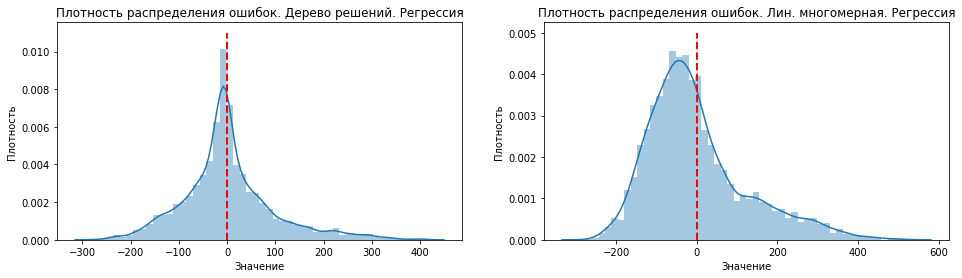

In [39]:
plt.figure(figsize=(16,4))

plt.subplot(121)
sns.distplot((y_test_diap - y_treeRegr_d5_diap.reshape(-1,1)))
plt.plot(
    [0, 0],
    [0, 11* pow(10,-3)], '--', lw=2, c='r')
plt.title(u'Плотность распределения ошибок. Дерево решений. Регрессия');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

plt.subplot(122)
sns.distplot((y_test_diap - y_pred_LinRegrMult2))
plt.plot(
    [0, 0],
     [0, 5* pow(10,-3)], '--', lw=2, c='r')
plt.title(u'Плотность распределения ошибок. Лин. многомерная. Регрессия');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

Text(0,0.5,u'\u043a\u0432\u0430\u0434\u0440\u0430\u0442 \u0437\u043d\u0430\u0447\u0435\u043d\u0438\u044f \u043e\u0448\u0438\u0431\u043a\u0438 \u043c\u043e\u0434\u0435\u043b\u0438 Y')

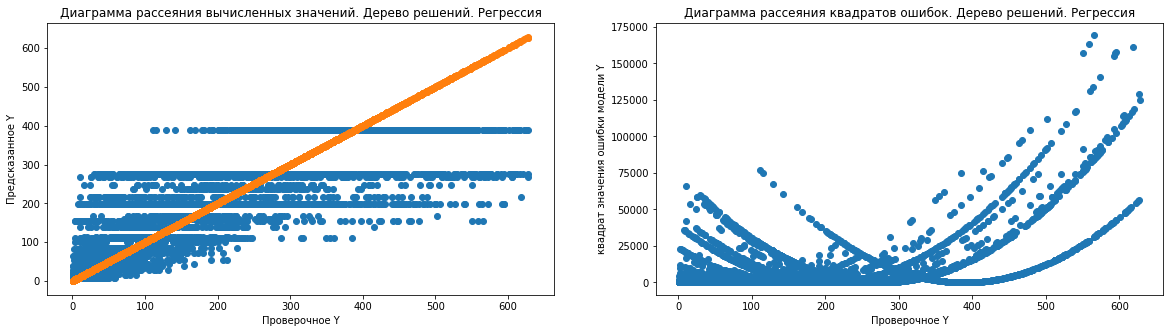

In [40]:
# Графики на одном полотне

plt.figure(figsize=figsize(20,5))
plt.subplot(121)
plt.scatter(y_test_diap, y_treeRegr_d5_diap)
plt.scatter(y_test_diap, y_test_diap)
plt.title(u'Диаграмма рассеяния вычисленных значений. Дерево решений. Регрессия');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

plt.subplot(122)
plt.scatter(y_test_diap,  pow(abs(y_test_diap - y_treeRegr_d5_diap.reshape(-1,1)),2) )
plt.title(u'Диаграмма рассеяния квадратов ошибок. Дерево решений. Регрессия');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'квадрат значения ошибки модели Y')

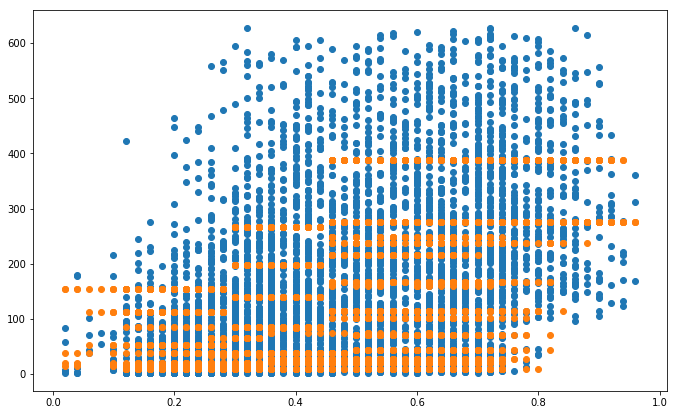

In [41]:
plt.figure(figsize=figsize(25,7))
plt.subplot(121)
plt.scatter(x_test_diap['temp'], y_test_diap)
plt.scatter(x_test_diap['temp'], y_treeRegr_d5_diap)

In [42]:
len(y_treeRegr_d5_diap)

5043

In [43]:
shape(x_train_diap)

(11766, 3)

In [44]:
# сохранение структуры дерева в промежуточном формате *.dot
export_graphviz(treeRegr_d5, out_file='treeRegr_d5.dot')

In [45]:
# создание графического изображения структуры дерева решений при помощи ПО "Graphviz"
# путь(абсолютный или относительный) к внешнему исполняемому файлу \graphviz-2.38\release\bin\dot.exe
!..\graphviz-2.38\release\bin\dot.exe -Tpng treeRegr_d5.dot -o treeRegr_d5.png

In [46]:
print features

[u'temp', u'hr', u'hum']


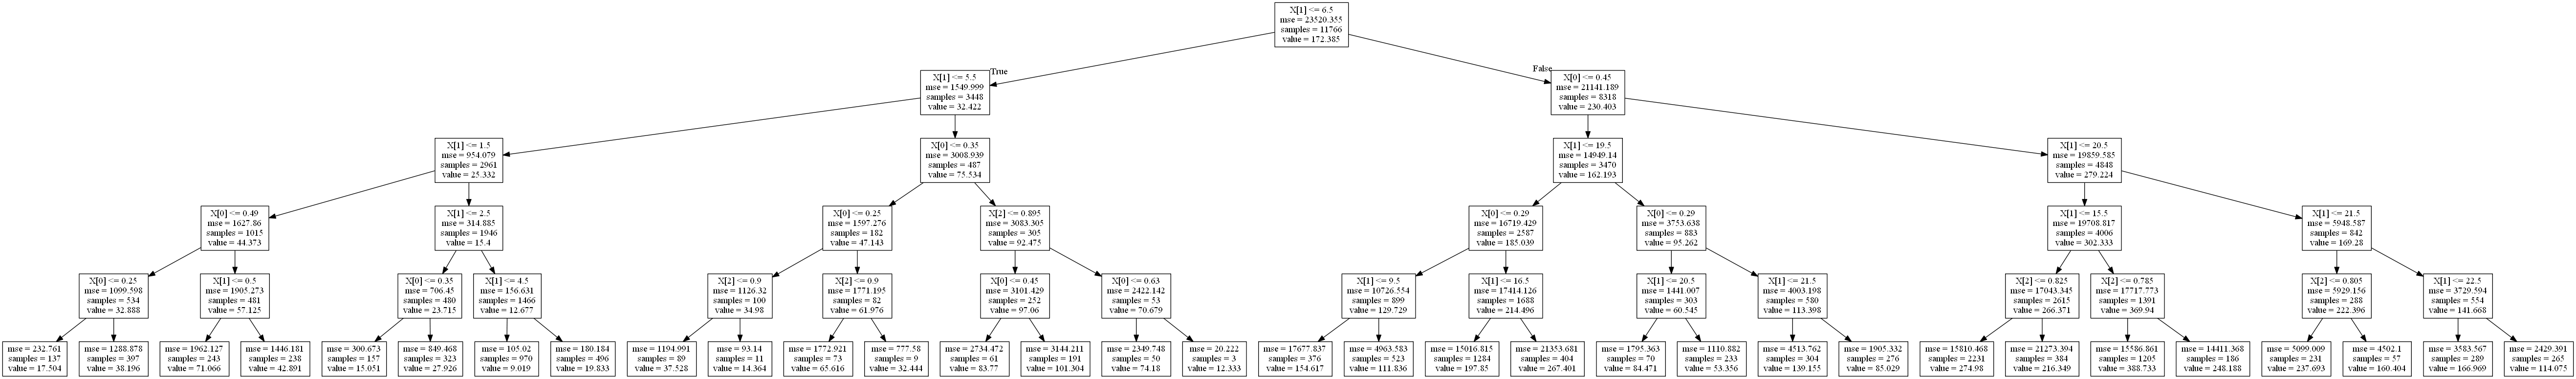

In [47]:
# показать изображение
from IPython.display import Image
Image(filename='treeRegr_d5.png')

X[0] - temp, 
X[1] - hr, 6.5, 
X[2] - hum,

## 3. Выводы

В ходе выполнения лабораторной работы были построены две модели: модель множественной регрессии и дерево регрессии. В обеих моделях целевой переменной было количество клиентов (cnt), а признаки - время суток (hr), температура (temp), влажность (hum).



Для множественной регрессии на всем объеме значений целевой переменной коэффициент детерминации составил 0.329, на усеченном объеме значений - 0.351, что является значимым показателем в случае линейной регрессии.

Для дерева регрессии коэффициент детерминации равен 0.654, что говорит о хороших предсказательных качествах модели.